In [1]:
# MNIST is a set of 70.000 digits handwritten with each images is labeled with the digits it represent

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
# extra code – it's a bit too long
# print(mnist.DESCR)

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
# There are 70.000 images and each image has 784 features (pixes)
# Each image has: 28 rows, 28 coloumns 
# Each feature rapresent one pixel intensity from 0 (white) to 1 (black)
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
# Plot one digit
import matplotlib as mlp
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
some_digit_image = some_digit.reshape(28,28)
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

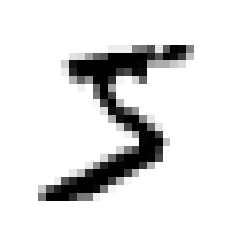

In [11]:
plt.imshow(some_digit_image, cmap = mlp.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [12]:
y[0]

'5'

In [13]:
# Cast label to integer from string
y = y.astype(np.uint8)

In [14]:
y[0]

5

In [15]:
# MNIST dataset is already split into a training and test set
# First 60.000 digit are the training set and the last 10.000 are the test set
X_train, X_test, y_train, y_test = X[:60000], X[600000:], y[:60000], y[60000:]

In [16]:
# Training a binary classifier
# For now only try to identify one digit (digit 5)
# This type of classifier is capable of distinguish between 5 and not-5

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
# Create a target vectors for classification task
# y_train_5: array([ True, False, False, ...,  True, False, False])
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
# y_test_5: array([False, False, False, ..., False,  True, False])
y_test_5 = (y_test == 5)
y_test_5

array([False, False, False, ..., False,  True, False])

In [21]:
# Now we start with a SGD (Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier

In [22]:
# Training with X and y_5 (true or false)
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
# After the training phase we can use this classifier for check if one example is 5 
detection_5 = sgd_clf.predict([some_digit])

In [24]:
detection_5

array([ True])

In [25]:
# Check with a false value
some_digit_false = X[1]

In [26]:
some_digit_false_image = some_digit_false.reshape(28,28)
some_digit_false_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

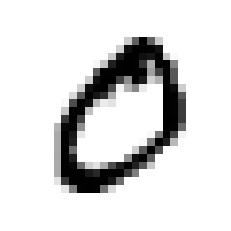

In [27]:
plt.imshow(some_digit_false_image, cmap = mlp.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [28]:
detection_no_5 = sgd_clf.predict([some_digit_false])

In [29]:
detection_no_5

array([False])

In [30]:
# Now we evaluate model's performance
# There are many performance measures available
# 1: Cross validation
# 2: Confusion matrix
# 3: Precision and Recall

In [31]:
# Cross validation on training set. It's possible to apply the cross-validation on training and test set.
# Split training set in k-folds (3) then making predictions and evaluating them on a each fold using a model trained on the remaining folds
# Return Array of scores of the estimator for each run of the cross validation.

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [32]:
# Above 95 % of accuracy (ration od correct predictions). But accuracy generally is not the preferred performance measures

In [33]:
# Confusion matrix: count the number of times instances of class A are classified as class B
# We need to have a set of predictions that they can be compared to the actual targets
# We use a cross validation predict that returning the prediction made on each folds.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [34]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [35]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

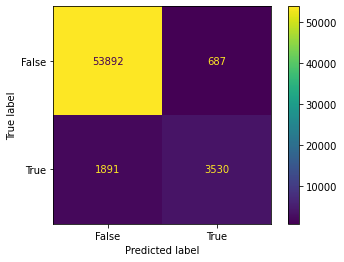

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sgd_clf.classes_)
disp.plot()

In [37]:
# A perfect classifier would have only true positives and true negatives

In [53]:
# Precision and Recall
# Precision: accuracy of the positive predictions
# Recall: ratio of positive instances that are correctly detected by the classifier 
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
# The model says that there is a 5 but it is correct only 77% of the time

0.8370879772350012

In [39]:
recall_score(y_train_5, y_train_pred)
# The model detect 80% of the 5s during the inference

0.6511713705958311

In [40]:
# Often precision and recall are combined into a single metrics F1 score. This is used in partcular when we need to comapre 2 different classifier
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)
f1

0.7325171197343846

In [47]:
# We can't have high Precision and high Recall at the same time (Precision/Recall trade off)
# Instead of method predict it's possibile call decision_function() wich returns a score for each instance and make prediction based on this score

# Calculete the score for all instances in the training set using cross validation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [48]:
# How decide witch threshold use? Precision Recall curve
from sklearn.metrics import precision_recall_curve

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [54]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

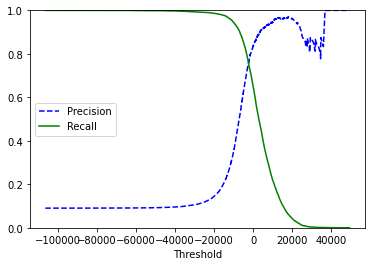

In [55]:
plot_precision_recall(precisions, recalls,thresholds)
plt.show()

In [ ]:
# With this graph we can choose the right threshold value for our task.

In [ ]:
# MULTICLASS 

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf = RandomForestClassifier(max_depth=10, random_state=0) 
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [64]:
clf.predict([some_digit])

array([5], dtype=uint8)

In [65]:
clf.predict_proba([some_digit])

array([[0.01405456, 0.01861768, 0.04224289, 0.2032901 , 0.00438969,
        0.61933237, 0.01569339, 0.03071691, 0.03597705, 0.01568537]])